# My Keras experings on Jupiter Notebook

Make sure conda enviroment is activacted and keras is installed
I used the same env of fast.ai because I'm going to test bost libraries.

Init library for plotting and model definition

In [20]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [21]:
import numpy
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense
from keras.wrappers.scikit_learn import KerasRegressor
%matplotlib inline
seed = 7
numpy.random.seed(seed)

Let's demo a function

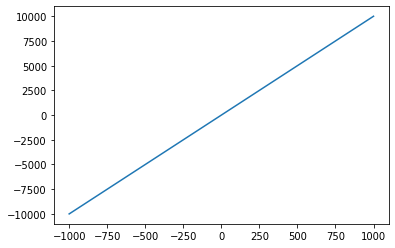

In [506]:
x = np.linspace(-1000, 1000)
y=x*10
plt.plot(x, y)

Showing the content of X variable

## Let's start experimenting with keras 

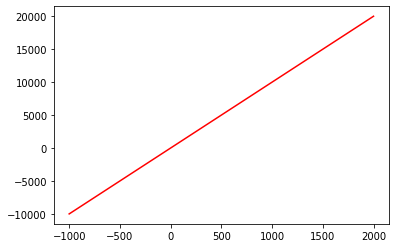

In [497]:
trainX = np.linspace(-1000,2000,1000).reshape(-1,1)
trainY = trainX*10
plt.plot(trainX, trainY, 'r')

Normalize the data

In [498]:
for i in range(5):
	print(trainX[i], trainY[i])

[-1000.] [-10000.]
[-996.996997] [-9969.96996997]
[-993.99399399] [-9939.93993994]
[-990.99099099] [-9909.90990991]
[-987.98798799] [-9879.87987988]


In [499]:

scaler = StandardScaler()
scaler.fit(trainY)
# standardization the dataset and print the first 5 rows
normalizedX = scaler.transform(trainX)
normalizedY = scaler.transform(trainY)
for i in range(5):
	print(normalizedX[i], trainY[i])

[-0.69212785] [-10000.]
[-0.69178144] [-9969.96996997]
[-0.69143503] [-9939.93993994]
[-0.69108862] [-9909.90990991]
[-0.69074221] [-9879.87987988]


In [511]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation="linear"))

In [514]:
import keras

sgd = keras.optimizers.SGD(lr=0.3)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy', 'mse'])

In [515]:
print("Initial weights")
for layer in model.layers:
    weights = layer.get_weights() # list of numpy arrays
    print(weights)

Initial weights
[array([[9.999998]], dtype=float32), array([5.1909575], dtype=float32)]


In [516]:
model.fit(normalizedX, normalizedY, epochs=8, batch_size=1)

Epoch 1/8
1000/1000 [==============================] - 6s 6ms/step - loss: 1.8215e-13 - acc: 0.0000e+00 - mean_squared_error: 1.8215e-13
Epoch 2/8
1000/1000 [==============================] - 3s 3ms/step - loss: 1.8215e-13 - acc: 0.0000e+00 - mean_squared_error: 1.8215e-13
Epoch 3/8
1000/1000 [==============================] - 3s 3ms/step - loss: 1.8215e-13 - acc: 0.0000e+00 - mean_squared_error: 1.8215e-13
Epoch 4/8
1000/1000 [==============================] - 3s 3ms/step - loss: 1.8215e-13 - acc: 0.0000e+00 - mean_squared_error: 1.8215e-13
Epoch 5/8
1000/1000 [==============================] - 3s 3ms/step - loss: 1.8215e-13 - acc: 0.0000e+00 - mean_squared_error: 1.8215e-13
Epoch 6/8
1000/1000 [==============================] - 3s 3ms/step - loss: 1.8215e-13 - acc: 0.0000e+00 - mean_squared_error: 1.8215e-13
Epoch 7/8
1000/1000 [==============================] - 3s 3ms/step - loss: 1.8215e-13 - acc: 0.0000e+00 - mean_squared_error: 1.8215e-13
Epoch 8/8
1000/1000 [====================

In [517]:
model.predict([100])

array([[1005.1908]], dtype=float32)

Extract weight matrix

In [518]:
print("Model layers: {0}".format(len(model.layers)))
for layer in model.layers:
    weights = layer.get_weights() # list of numpy arrays
    print(weights)

Model layers: 1
[array([[9.999998]], dtype=float32), array([5.1909575], dtype=float32)]


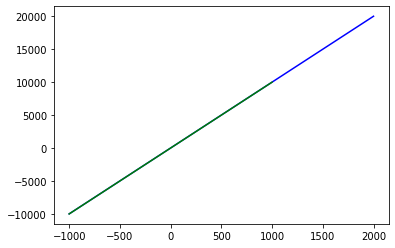

In [507]:
plt.plot(trainX, model.predict(trainX), 'b', x, y, 'g')